## EXPLORATORY DATA ANALYSIS

In [1]:
#Import Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#Read the clean patient infor files and appropriately import the date time column
custome_date_parser = lambda x: datetime.strptime(x, '%y-%m-%d %H:%M:%S')
df_ECG_data = pd.read_csv(r'ptbxl_database_cleaned.csv', parse_dates= ['recording_date'], infer_datetime_format= True, index_col= 'ecg_id')

In [3]:
df_ECG_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20699 entries, 1 to 21837
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   patient_id                    20699 non-null  float64       
 1   age                           20699 non-null  float64       
 2   sex                           20699 non-null  int64         
 3   height                        20699 non-null  float64       
 4   weight                        20699 non-null  float64       
 5   recording_date                20699 non-null  datetime64[ns]
 6   scp_codes                     20699 non-null  object        
 7   heart_axis                    13035 non-null  object        
 8   validated_by                  11784 non-null  float64       
 9   second_opinion                20699 non-null  bool          
 10  initial_autogenerated_report  20699 non-null  bool          
 11  validated_by_human          

In [4]:
df_ECG_data.head()

,patient_id,age,sex,height,weight,recording_date,scp_codes,heart_axis,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,electrodes_problems,strat_fold,filename_lr,filename_hr,Age_Group,Height_Group,Weight_Group,heart_rhythm
ecg_id,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,166.0,63.0,1984-11-09 09:17:34,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,False,False,True,no,3,records100/00000/00001_lr,records500/00000/00001_hr,"(55, 70]","(90, 166]","(60, 70]",SR
2,13243.0,19.0,0,166.0,70.0,1984-11-14 12:55:37,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,False,False,True,no,2,records100/00000/00002_lr,records500/00000/00002_hr,"(0, 55]","(90, 166]","(60, 70]",SBRAD
3,20372.0,37.0,1,166.0,69.0,1984-11-15 12:49:10,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,False,False,True,no,5,records100/00000/00003_lr,records500/00000/00003_hr,"(0, 55]","(90, 166]","(60, 70]",SR
4,17014.0,24.0,0,166.0,82.0,1984-11-15 13:44:57,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,False,False,True,no,3,records100/00000/00004_lr,records500/00000/00004_hr,"(0, 55]","(90, 166]","(80, 210]",SR
5,17448.0,19.0,1,166.0,70.0,1984-11-17 10:43:15,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,False,False,True,no,4,records100/00000/00005_lr,records500/00000/00005_hr,"(0, 55]","(90, 166]","(60, 70]",SR


In [5]:
#Setup plotting some plotting format
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}

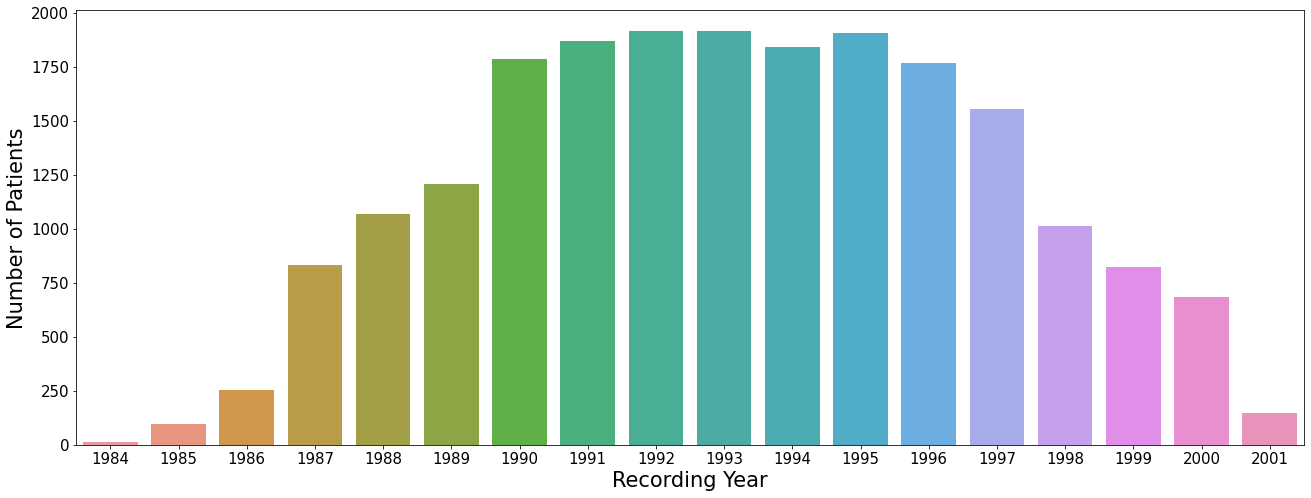

In [6]:
#Plot then number of patiants recordedd each year to see the trend patient recording
fig, ax = plt.subplots(figsize= (22, 8))
g= sns.countplot(x=df_ECG_data['recording_date'].dt.year, ax= ax)

ax.set_xlabel('Recording Year', fontdict= axis_label)
ax.set_xticklabels(ax.get_xticklabels(), fontdict= ticks_label)

_= ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.tick_params(axis= 'both', labelsize= 15)

From the plot patient most patient where enrolled between 1990 and 1997. 

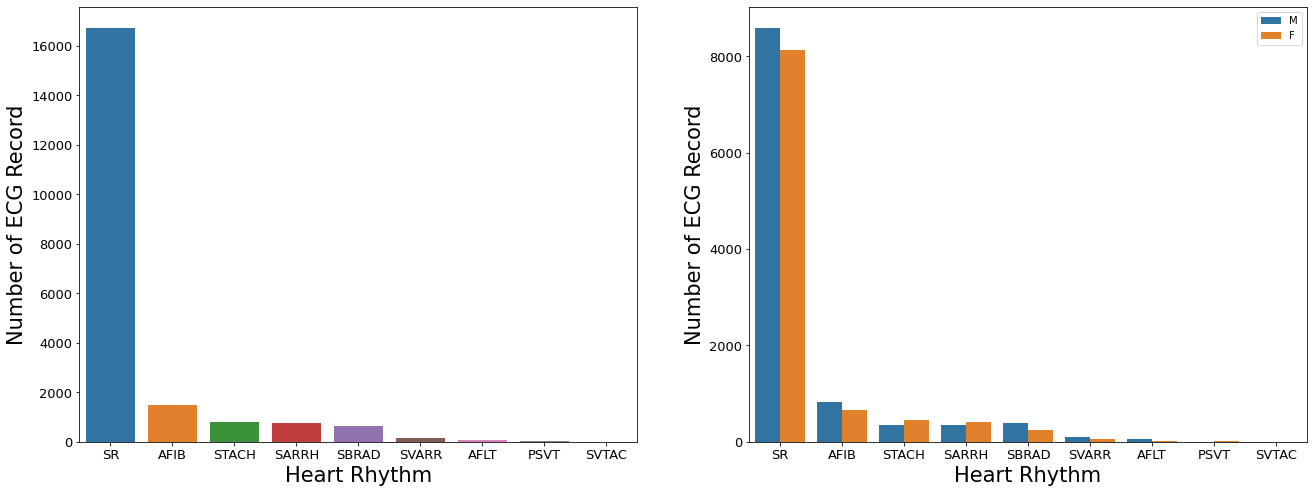

In [7]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, (ax1, ax2) = plt.subplots(figsize= (22, 8), ncols= 2, nrows= 1)
g1= sns.countplot(x= 'heart_rhythm', data= df_ECG_data, ax= ax1, order= df_ECG_data.heart_rhythm.value_counts().index)
g2= sns.countplot(x= 'heart_rhythm', data= df_ECG_data, ax= ax2, hue= 'sex', order= df_ECG_data.heart_rhythm.value_counts().index)

ax1.set_xlabel('Heart Rhythm', fontdict=axis_label)
ax2.set_xlabel('Heart Rhythm', fontdict= axis_label)

ax1.set_ylabel('Number of ECG Record', fontdict= axis_label)
ax2.set_ylabel('Number of ECG Record', fontdict= axis_label)

ax1.tick_params(axis= 'both', labelsize= ticks_label['size'])
ax2.tick_params(axis= 'both', labelsize= ticks_label['size'])

legend_text = ['M', 'F']
_= ax2.legend(legend_text)

The plot shows that the data is imbalance and this may impact the result of the model and consideration should be given to reblance the data. To simplify the model first consider identifying Sinus Rhythm (SR --> Normal Rhythm), Atrial Fibrillation (AFIB --> Most common Arythmia) and Other Rhythm (Combine the rest)


In [8]:
#A function that takes the heart rhythm and returns either SR, AFIB or OTHER
def AFIB_diagnosis (heart_rhythm):
    Temp = ['SR', 'AFIB']
    if heart_rhythm not in Temp:
        return "OTHER"
    else:
        return heart_rhythm

In [9]:
#Create a column in the data frame for the AFIB dianosis.
df_ECG_data['AFIB_diagnosis'] = df_ECG_data.heart_rhythm.apply(AFIB_diagnosis)

In [10]:
#Save the cleaned ECG data frame for future use.
df_ECG_data.to_csv('ptbxl_database_cleaned.csv')

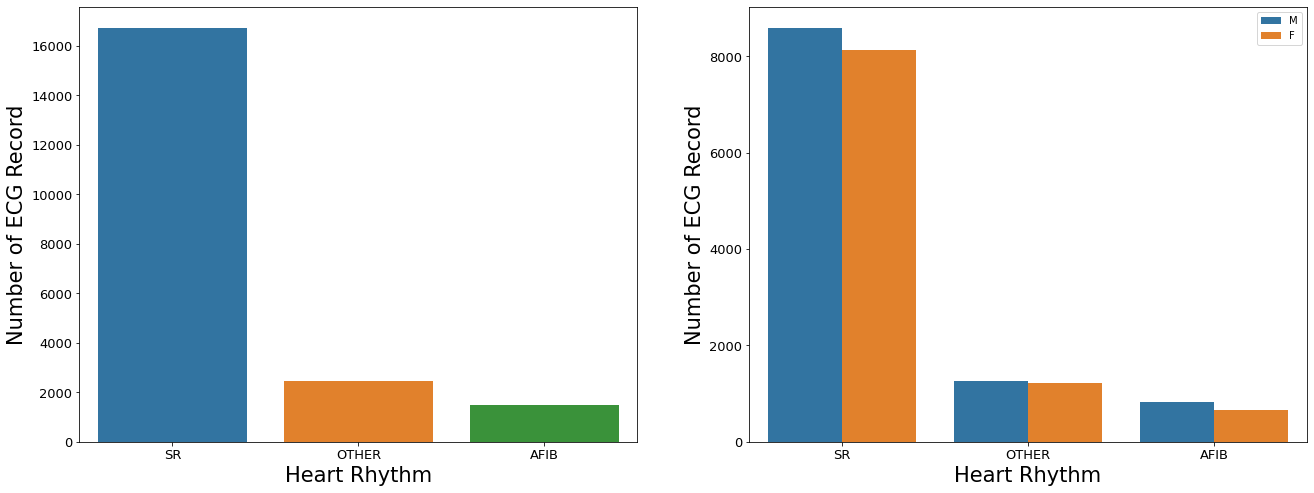

In [11]:
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, (ax1, ax2) = plt.subplots(figsize= (22, 8), ncols= 2, nrows= 1)
g1= sns.countplot(x= 'AFIB_diagnosis', data= df_ECG_data, ax= ax1, order= df_ECG_data.AFIB_diagnosis.value_counts().index)
g2= sns.countplot(x= 'AFIB_diagnosis', data= df_ECG_data, ax= ax2, hue= 'sex', order= df_ECG_data.AFIB_diagnosis.value_counts().index)

ax1.set_xlabel('Heart Rhythm', fontdict=axis_label)
ax2.set_xlabel('Heart Rhythm', fontdict= axis_label)

ax1.set_ylabel('Number of ECG Record', fontdict= axis_label)
ax2.set_ylabel('Number of ECG Record', fontdict= axis_label)

ax1.tick_params(axis= 'both', labelsize= ticks_label['size'])
ax2.tick_params(axis= 'both', labelsize= ticks_label['size'])

legend_text = ['M', 'F']
_= ax2.legend(legend_text)


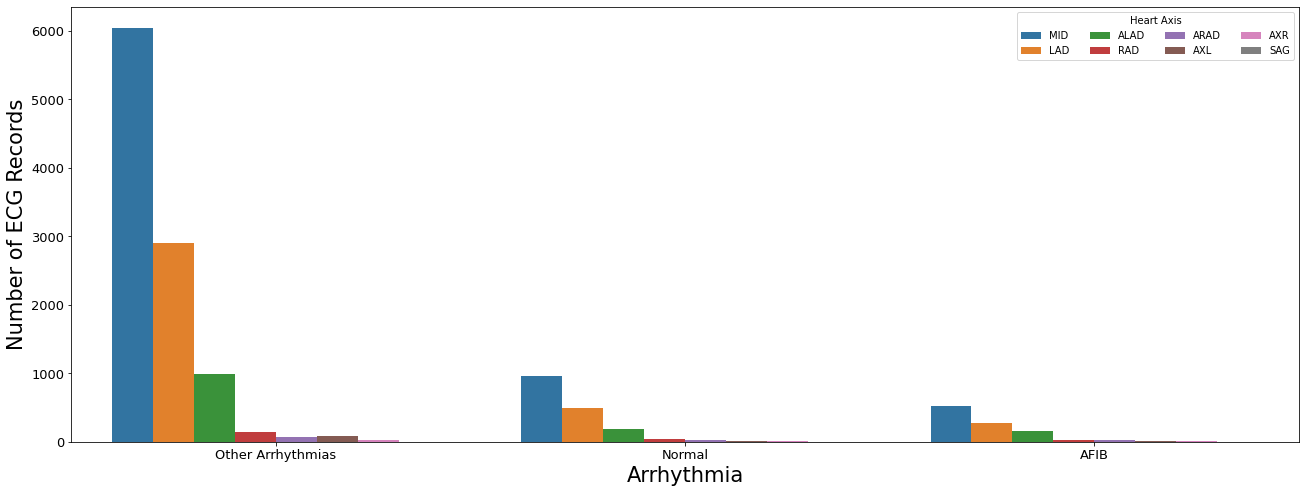

In [12]:
#plot heart axis
axis_label = {'size': 21, 'weight': 500}
ticks_label = {'size': 13}
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'AFIB_diagnosis', data= df_ECG_data, ax= ax, hue= 'heart_axis', order= df_ECG_data.AFIB_diagnosis.value_counts().index, hue_order= df_ECG_data.heart_axis.value_counts().index)

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of ECG Records', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

_= ax.legend(ncol=4, title= "Heart Axis")

In general the Axis plot shows a specific trend (MID > LAD > ALAD etc) across all Arrhythmia. This suggest that Heart axis may be not be a significant factor in determining AFIB. for this reason axis will be eliminated from ML model. This will simplify the model.

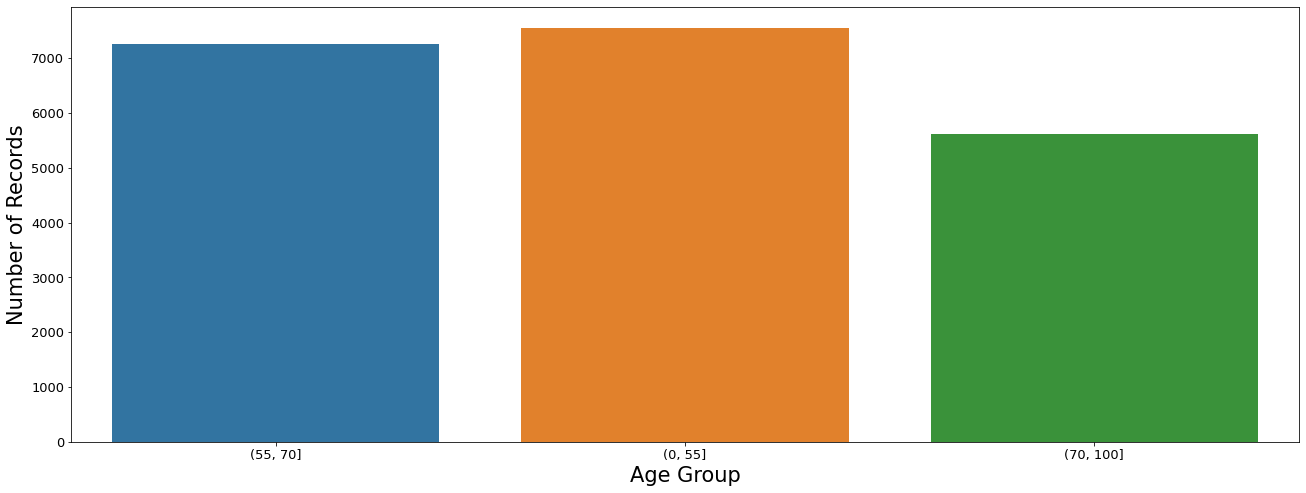

In [13]:
#Plot age group. Different groupings were tried in order to get a uniform distribution. 
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Age_Group', data= df_ECG_data, ax= ax)

ax.set_xlabel('Age Group', fontdict= axis_label)
ax.set_ylabel('Number of Records', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

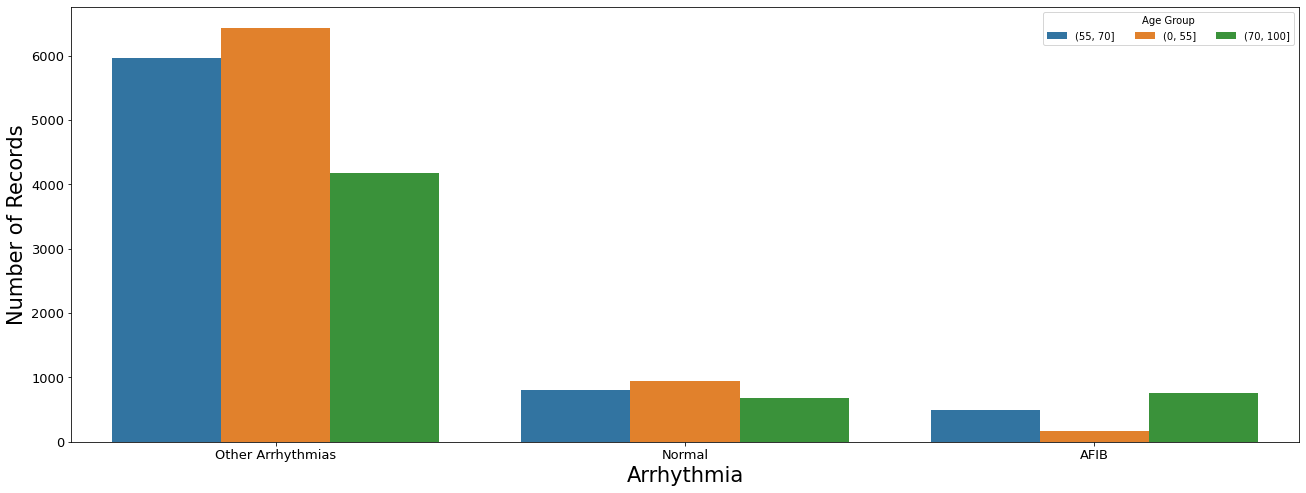

In [14]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'AFIB_diagnosis', data= df_ECG_data, ax= ax, hue= 'Age_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Records', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Age Group")

Interesting result. Looks like younger people tend to have some kind of Arrhythmia. It's possible that on the onset of arrhythmia it gets treated immediately or they may not live long enough. However, the plot also suggest that older people are more likely to be dianosed with AFIB.

The trend from the plot suggest that Age is a significant factor in determining the Arrhythmia. Thus, might be a good candidate to include in the model to improve the accuracy of the prediction

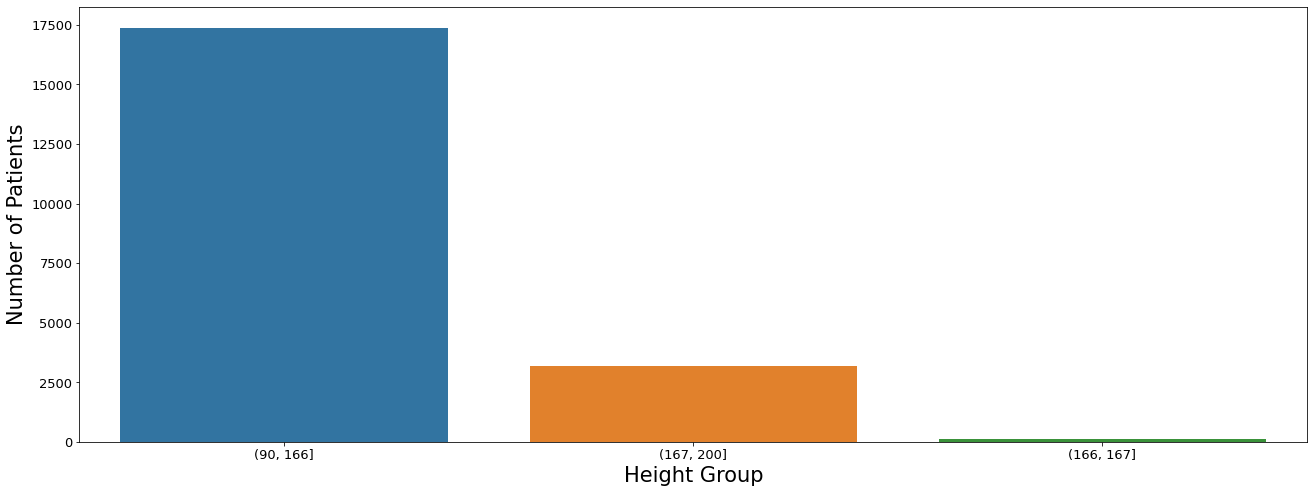

In [15]:
#Ploting height group.
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Height_Group', data= df_ECG_data, ax= ax)

ax.set_xlabel('Height Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

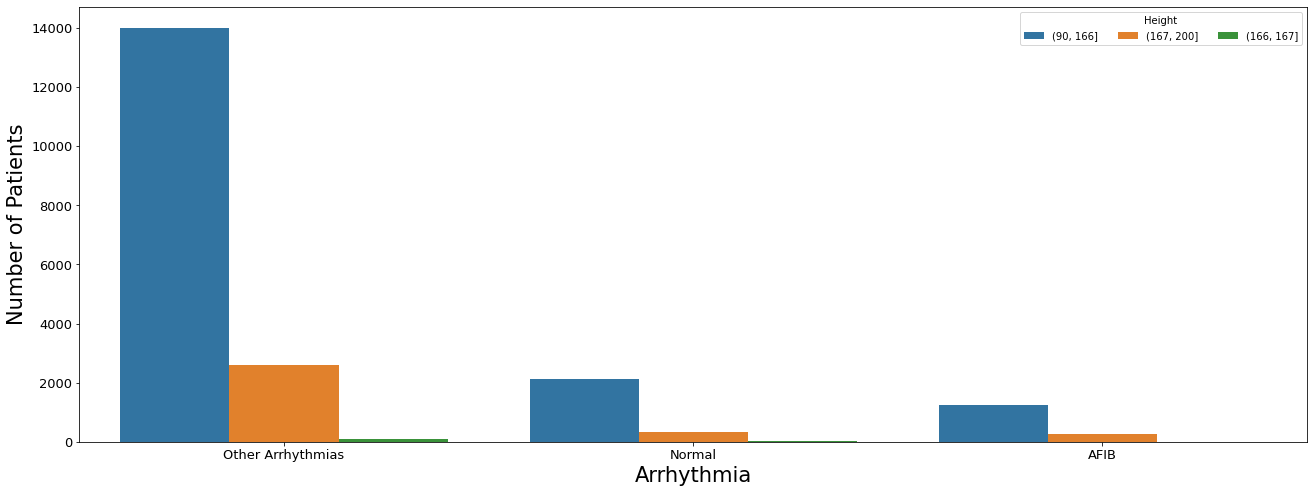

In [16]:

fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'AFIB_diagnosis', data= df_ECG_data, ax= ax, hue= 'Height_Group')

ax.set_xlabel('Arrhythmia', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)

ax.set_xticklabels(['Other Arrhythmias', 'Normal', 'AFIB'])

ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

ax.legend(ncol=3, title= "Height")

 Binning the height data turned out to be challenging. This is because majority of the data was missing and was replaced by the mean. This may be a problem for the ML. Therefore, it will be removed from the model. This should improve the model prediction and simplify the model.

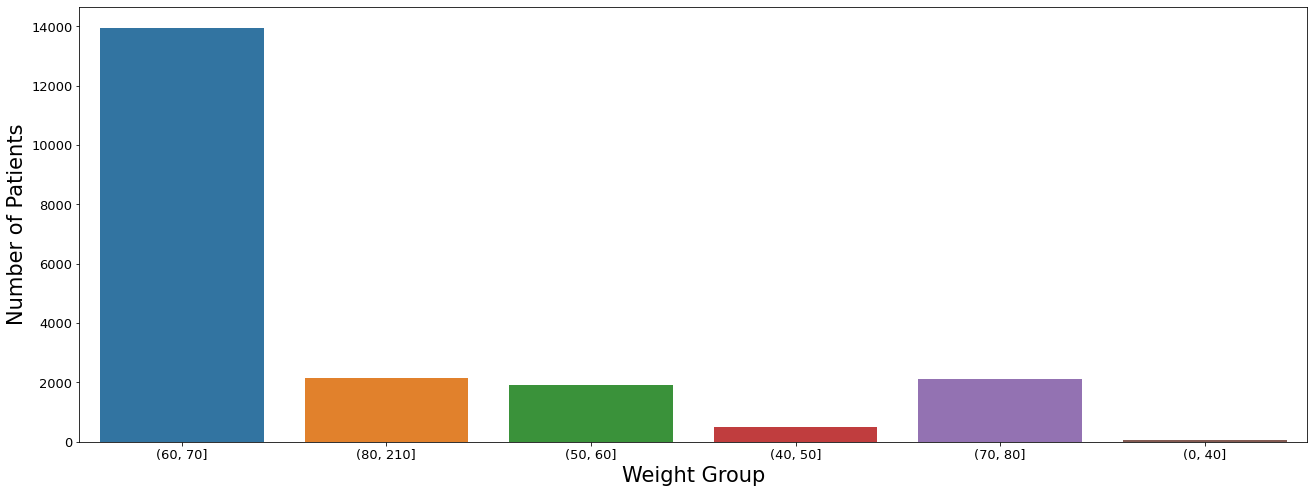

In [17]:
fig, ax= plt.subplots(figsize= (22, 8))
g= sns.countplot(x= 'Weight_Group', data= df_ECG_data, ax= ax)

ax.set_xlabel('Weight Group', fontdict= axis_label)
ax.set_ylabel('Number of Patients', fontdict= axis_label)



ax.tick_params(axis= 'both', labelsize= ticks_label['size'])

Similar to the height data. Therefore, will be eliminated from the model as well.